In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

In [633]:
# Read transaction data, store lookup data, and products lookup data into pandas DataFrames
df_transaction = pd.read_csv('transtaction_data.csv', delimiter=';')
df_store = pd.read_csv('store_lookup.csv',delimiter=';')
df_product = pd.read_csv('products_lookup.csv', delimiter=';')


In [132]:
df_transaction.head(3)

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY
0,14.01.2009,367,1111009477,13,13,13,"18,07","1,39","1,57",0,0,1
1,14.01.2009,367,1111009497,20,18,18,"27,8","1,39","1,39",0,0,0
2,14.01.2009,367,1111009507,14,14,14,"19,32","1,38","1,38",0,0,0


In [133]:
df_store.head(3)

,STORE_ID,STORE_NAME,ADDRESS_CITY_NAME,ADDRESS_STATE_PROV_CODE,MSA,SEG_VALUE_NAME,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS,Latitude,Longitude
0,389,SILVERLAKE,ERLANGER,KY,17140,MAINSTREAM,408.0,46073,24767,"39,01994","-84,593645"
1,2277,ANDERSON TOWNE CTR,CINCINNATI,OH,17140,UPSCALE,NaN,81958,54053,"39,058412","-84,339639"
2,4259,WARSAW AVENUE,CINCINNATI,OH,17140,VALUE,NaN,48813,31177,"39,11161","-84,577994"


In [134]:
df_product.head(3)

,UPC,DESCRIPTION,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE
0,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
1,1111009497,PL PRETZEL STICKS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
2,1111009507,PL TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ


In [634]:
# Merge transaction data with store lookup data based on the store number
df_merged = pd.merge(df_transaction, df_store, left_on='STORE_NUM', right_on='STORE_ID', how='inner')
df_merged.head()

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,STORE_ID,STORE_NAME,ADDRESS_CITY_NAME,ADDRESS_STATE_PROV_CODE,MSA,SEG_VALUE_NAME,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS,Latitude,Longitude
0,14.01.2009,367,1111009477,13,13,13,"18,07","1,39","1,57",0,0,1,367,15TH & MADISON,COVINGTON,KY,17140,VALUE,196.0,24721,12707,"39,05906","-84,542748"
1,14.01.2009,367,1111009497,20,18,18,"27,8","1,39","1,39",0,0,0,367,15TH & MADISON,COVINGTON,KY,17140,VALUE,196.0,24721,12707,"39,05906","-84,542748"
2,14.01.2009,367,1111009507,14,14,14,"19,32","1,38","1,38",0,0,0,367,15TH & MADISON,COVINGTON,KY,17140,VALUE,196.0,24721,12707,"39,05906","-84,542748"
3,14.01.2009,367,1111035398,4,3,3,14,"3,5","4,49",0,0,1,367,15TH & MADISON,COVINGTON,KY,17140,VALUE,196.0,24721,12707,"39,05906","-84,542748"
4,14.01.2009,367,1111038078,3,3,3,"7,5","2,5","2,5",0,0,0,367,15TH & MADISON,COVINGTON,KY,17140,VALUE,196.0,24721,12707,"39,05906","-84,542748"


In [635]:
# Merge the previously merged DataFrame with product lookup data based on the UPC
df = pd.merge(df_merged, df_product, left_on='UPC', right_on='UPC', how='inner')
df.head()

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,STORE_ID,STORE_NAME,ADDRESS_CITY_NAME,ADDRESS_STATE_PROV_CODE,MSA,SEG_VALUE_NAME,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS,Latitude,Longitude,DESCRIPTION,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE
0,14.01.2009,367,1111009477,13,13,13,"18,07","1,39","1,57",0,0,1,367,15TH & MADISON,COVINGTON,KY,17140,VALUE,196.0,24721,12707,"39,05906","-84,542748",PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
1,21.01.2009,367,1111009477,24,23,23,"33,36","1,39","1,57",0,0,1,367,15TH & MADISON,COVINGTON,KY,17140,VALUE,196.0,24721,12707,"39,05906","-84,542748",PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
2,28.01.2009,367,1111009477,7,7,7,"9,52","1,36","1,36",0,0,0,367,15TH & MADISON,COVINGTON,KY,17140,VALUE,196.0,24721,12707,"39,05906","-84,542748",PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
3,04.02.2009,367,1111009477,12,12,12,"16,56","1,38","1,38",0,0,0,367,15TH & MADISON,COVINGTON,KY,17140,VALUE,196.0,24721,12707,"39,05906","-84,542748",PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
4,11.02.2009,367,1111009477,16,14,14,24,"1,5","1,5",0,0,0,367,15TH & MADISON,COVINGTON,KY,17140,VALUE,196.0,24721,12707,"39,05906","-84,542748",PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ


In [636]:
# Convert column names to lowercase
df.columns= df.columns.str.lower()

In [138]:
df.shape

(538643, 28)

In [637]:
# Set the maximum number of columns to display to 30
pd.set_option('display.max_columns',30)

In [140]:
# Display concise summary of the DataFrame including column data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538643 entries, 0 to 538642
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   week_end_date            538643 non-null  object 
 1   store_num                538643 non-null  int64  
 2   upc                      538643 non-null  int64  
 3   units                    538643 non-null  int64  
 4   visits                   538643 non-null  int64  
 5   hhs                      538643 non-null  int64  
 6   spend                    538643 non-null  object 
 7   price                    538620 non-null  object 
 8   base_price               538458 non-null  object 
 9   feature                  538643 non-null  int64  
 10  display                  538643 non-null  int64  
 11  tpr_only                 538643 non-null  int64  
 12  store_id                 538643 non-null  int64  
 13  store_name               538643 non-null  object 
 14  addr

In [141]:
# Calculate the percentage of null values in each column and round to one decimal place
df_null_percent = round(df.isnull().sum() / df.shape[0] * 100,1)
df_null_percent

week_end_date               0.0
store_num                   0.0
upc                         0.0
units                       0.0
visits                      0.0
hhs                         0.0
spend                       0.0
price                       0.0
base_price                  0.0
feature                     0.0
display                     0.0
tpr_only                    0.0
store_id                    0.0
store_name                  0.0
address_city_name           0.0
address_state_prov_code     0.0
msa                         0.0
seg_value_name              0.0
parking_space_qty          68.0
sales_area_size_num         0.0
avg_weekly_baskets          0.0
latitude                    0.0
longitude                   0.0
description                 0.0
manufacturer                0.0
category                    0.0
sub_category                0.0
product_size                0.0
dtype: float64

In [638]:
# Drop useless columns from the DataFrame
df.drop(['parking_space_qty', 'latitude', 'longitude', 'upc', 'store_num', 'store_id', 'msa'], axis=1, inplace=True)

In [143]:
# Generate descriptive statistics of the DataFrame
df.describe()

,units,visits,hhs,feature,display,tpr_only,sales_area_size_num,avg_weekly_baskets
count,538643.000000,538643.000000,538643.000000,538643.000000,538643.000000,538643.000000,538643.000000,538643.000000
mean,19.623368,17.181955,16.796210,0.084468,0.110377,0.133842,50274.398459,24643.635592
std,29.851075,24.652451,24.102473,0.278088,0.313360,0.340483,13318.597040,8811.877465
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,10788.000000,10435.000000
25%,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,44175.000000,18197.000000
50%,11.000000,9.000000,9.000000,0.000000,0.000000,0.000000,48782.000000,24767.000000
75%,24.000000,21.000000,21.000000,0.000000,0.000000,0.000000,55663.000000,29436.000000
max,1800.000000,1340.000000,1286.000000,1.000000,1.000000,1.000000,86517.000000,54053.000000


In [639]:
# Select numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix and round to two decimal places
correlation_matrix = round(numeric_columns.corr(),2)
correlation_matrix

,units,visits,hhs,feature,display,tpr_only,sales_area_size_num,avg_weekly_baskets
units,1.00,0.99,0.98,0.30,0.31,-0.02,0.17,0.18
visits,0.99,1.00,1.00,0.29,0.31,-0.03,0.18,0.19
hhs,0.98,1.00,1.00,0.29,0.31,-0.03,0.19,0.19
feature,0.30,0.29,0.29,1.00,0.41,-0.12,-0.02,-0.01
display,0.31,0.31,0.31,0.41,1.00,-0.14,0.04,0.02
tpr_only,-0.02,-0.03,-0.03,-0.12,-0.14,1.00,-0.01,-0.01
sales_area_size_num,0.17,0.18,0.19,-0.02,0.04,-0.01,1.00,0.69
avg_weekly_baskets,0.18,0.19,0.19,-0.01,0.02,-0.01,0.69,1.00


Text(0.5, 1.0, 'Correlation Heatmap')

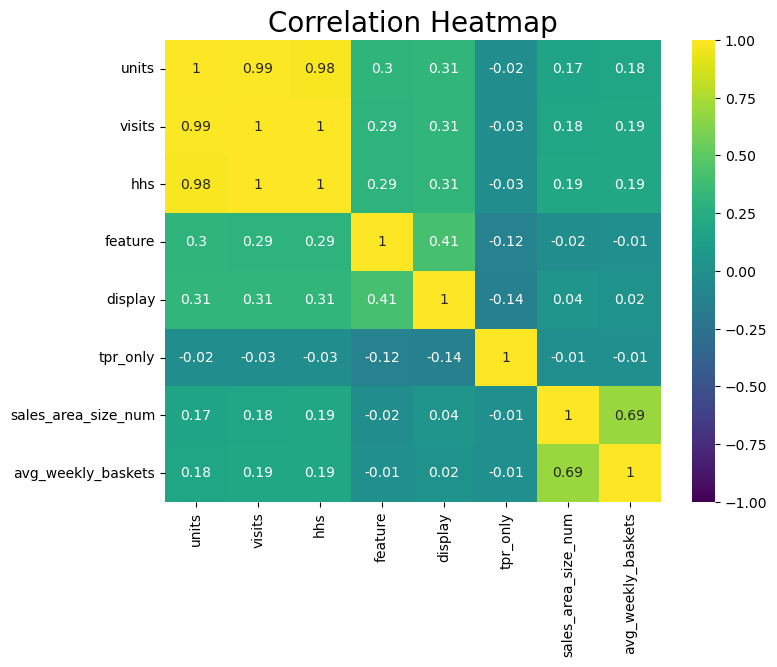

In [116]:
# Generate a heatmap to visualize the correlation matrix of numeric columns
plt.figure(figsize=(8,6))
corr_heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Correlation Heatmap', fontsize=20)

In [640]:
# Convert 'week_end_date' column to datetime format
df['week_end_date']=pd.to_datetime(df['week_end_date'])

C:\Users\Szymon Świeży\AppData\Local\Temp\ipykernel_26556\3664637670.py:1: UserWarning:

Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [641]:
# Replace commas with dots in 'spend', 'price', and 'base_price' columns and convert them to numeric
df[['spend', 'price', 'base_price']] = df[['spend', 'price', 'base_price']].replace({',': '.'}, regex=True)
df[['spend', 'price', 'base_price']] = df[['spend', 'price', 'base_price']].apply(pd.to_numeric)


In [149]:
# Count the number of unique values in each column
df.nunique()

week_end_date                156
units                        568
visits                       456
hhs                          446
spend                      17523
price                        699
base_price                   676
feature                        2
display                        2
tpr_only                       2
store_name                    73
address_city_name             51
address_state_prov_code        4
seg_value_name                 3
sales_area_size_num           73
avg_weekly_baskets            77
description                   52
manufacturer                  16
category                       4
sub_category                   7
product_size                  28
dtype: int64

In [278]:
sns.set_theme(style='white', palette='mako', font='Verdana', font_scale=0.8)

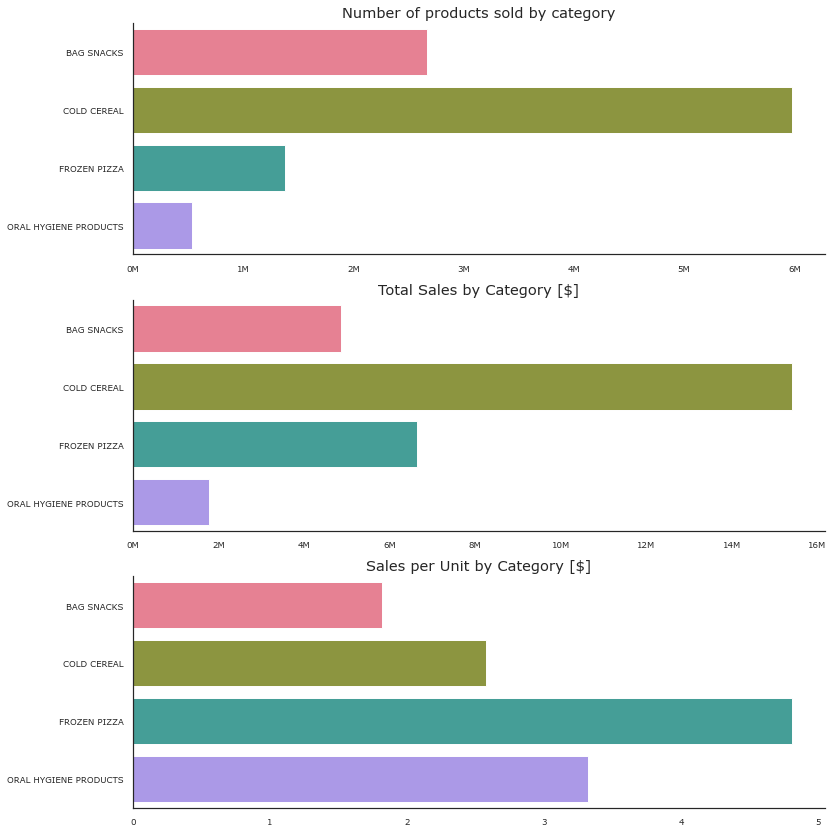

In [386]:
# This code calculates and visualizes various sales metrics by category.
# 1. First, it groups the DataFrame 'df' by the 'category' column and calculates the total units sold and total spend for each category.
# 2. Then, it merges these calculated sums into a new DataFrame called 'sales_per_unit' and calculates the sales per unit ratio.
# 3. Next, it resets the index of 'sales_per_unit' DataFrame to make 'category' a regular column.
# 4. Finally, it creates a figure with three subplots:
#    a. The first subplot shows the number of products sold by category.
#    b. The second subplot shows the total sales by category.
#    c. The third subplot shows the sales per unit by category.
# Each subplot is represented as a barplot with appropriate titles and axis labels.


category_sum = df.groupby('category')['units'].sum()
sales_sum = df.groupby('category')['spend'].sum()
sales_per_unit = pd.merge(category_sum, sales_sum, left_on='category', right_on='category', how='inner')
sales_per_unit['ratio'] = round(sales_per_unit['spend'] / sales_per_unit['units'], 2)
sales_per_unit = sales_per_unit.reset_index()

category_sum = df.groupby('category')['units'].sum()
sales_sum = df.groupby('category')['spend'].sum()
sales_per_unit = pd.merge(category_sum, sales_sum, left_on='category', right_on='category', how='inner')
sales_per_unit['ratio'] = round(sales_per_unit['spend'] / sales_per_unit['units'], 2)
sales_per_unit = sales_per_unit.reset_index()

fig, ax = plt.subplots(3, 1, figsize=(12, 12), dpi=70)

sns.barplot(y=category_sum.index, x=category_sum, palette='husl', ax=ax[0])
ax[0].set_title('Number of products sold by category', fontsize=15)
ax[0].set_xlabel('')
ax[0].set_ylabel('')
formatter = ticker.FuncFormatter(lambda x, pos: f'{x / 1e6:.0f}M')
ax[0].xaxis.set_major_formatter(formatter)
sns.despine(ax=ax[0])

sns.barplot(y=sales_sum.index, x=sales_sum, palette='husl', ax=ax[1])
ax[1].set_title('Total Sales by Category [$]', fontsize=15)
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(formatter)
sns.despine(ax=ax[1])

sns.barplot(y=sales_per_unit['category'], x=sales_per_unit['ratio'], palette='husl', ax=ax[2])
ax[2].set_title('Sales per Unit by Category [$]', fontsize=15)
ax[2].set_xlabel('')
ax[2].set_ylabel('')
sns.despine(ax=ax[2])

plt.tight_layout()
plt.show()


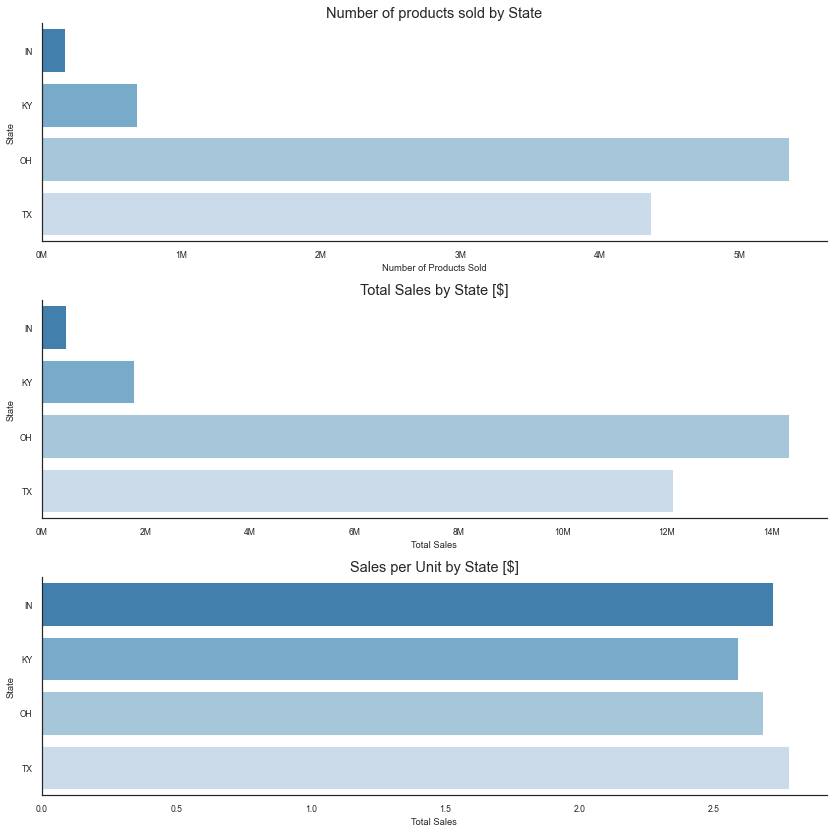

In [854]:
# This code calculates and visualizes various sales metrics by state.
# 1. First, it groups the DataFrame 'df' by the 'address_state_prov_code' column and calculates the total units sold and total spend for each state.
# 2. Then, it merges these calculated sums into a new DataFrame called 'state_sales_per_unit' and calculates the sales per unit ratio.
# 3. Next, it resets the index of 'state_sales_per_unit' DataFrame to make 'address_state_prov_code' a regular column.
# 4. Finally, it creates a figure with three subplots:
#    a. The first subplot shows the number of products sold by state.
#    b. The second subplot shows the total sales by state.
#    c. The third subplot shows the sales per unit by state.
# Each subplot is represented as a barplot with appropriate titles and axis labels.


state_sum = df.groupby('address_state_prov_code')['units'].sum()
state_sales_sum = df.groupby('address_state_prov_code')['spend'].sum()
state_sales_per_unit = pd.merge(state_sum, state_sales_sum, left_on='address_state_prov_code', right_on='address_state_prov_code', how='inner')
state_sales_per_unit['ratio'] = round(state_sales_per_unit['spend'] / state_sales_per_unit['units'], 2)
state_sales_per_unit = state_sales_per_unit.reset_index()

fig, ax = plt.subplots(3, 1, figsize=(12, 12), dpi=70)

sns.barplot(y=state_sum.index, x=state_sum, palette='tab20c', ax=ax[0])
ax[0].set_title('Number of products sold by State', fontsize=15)
ax[0].set_xlabel('Number of Products Sold')
ax[0].set_ylabel('State')
formatter = ticker.FuncFormatter(lambda x, pos: f'{x / 1e6:.0f}M')
ax[0].xaxis.set_major_formatter(formatter)
sns.despine(ax=ax[0])

sns.barplot(y=state_sales_sum.index, x=state_sales_sum, palette='tab20c', ax=ax[1])
ax[1].set_title('Total Sales by State [$]', fontsize=15)
ax[1].set_xlabel('Total Sales')
ax[1].set_ylabel('State')
ax[1].xaxis.set_major_formatter(formatter)
sns.despine(ax=ax[1])

sns.barplot(y=state_sales_per_unit['address_state_prov_code'], x=state_sales_per_unit['ratio'], palette='tab20c', ax=ax[2])
ax[2].set_title('Sales per Unit by State [$]', fontsize=15)
ax[2].set_xlabel('Total Sales')
ax[2].set_ylabel('State')
sns.despine(ax=ax[2])

plt.tight_layout()
plt.show()


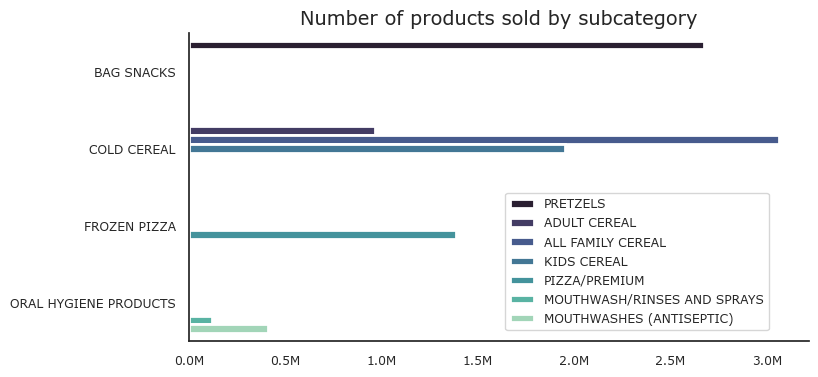

In [385]:
# This code calculates and visualizes the number of products sold by subcategory within each category using a grouped bar plot.

sub_category_sum = df.groupby(['category', 'sub_category'])['units'].sum().reset_index()

plt.figure(figsize=(8,4))
plt.fontsize=8
sns.barplot(y='category', x='units', hue='sub_category', data=sub_category_sum, linewidth=2, palette='mako' )

plt.xlabel('')
plt.ylabel('')
plt.title('Number of products sold by subcategory', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(0.5, 0.5))
formatter = ticker.FuncFormatter(lambda x, pos: f'{x / 1e6:.1f}M')
plt.gca().xaxis.set_major_formatter(formatter)
sns.despine()
plt.show()


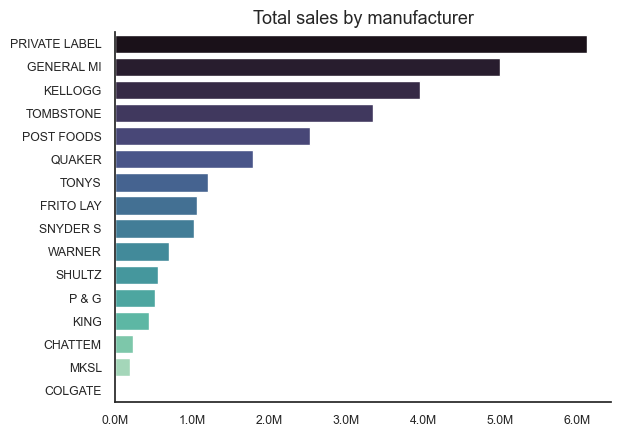

In [878]:
# This code calculates and visualizes the total sales by manufacturer using a horizontal bar plot.

df_manufacturer = df.groupby('manufacturer')['spend'].agg('sum').reset_index().sort_values(by='spend', ascending=False)
sns.barplot(data=df_manufacturer, x='spend', y='manufacturer', palette='mako')
plt.xlabel('')
plt.ylabel('')
plt.title('Total sales by manufacturer', fontsize=13)
formatter = ticker.FuncFormatter(lambda x, pos: f'{x / 1e6:.1f}M')
plt.gca().xaxis.set_major_formatter(formatter)
sns.despine()
plt.show()

In [899]:
# This code calculates and sorts various sales metrics by store.

sales_by_store = round(df.groupby(['store_name'])['spend'].agg([('Total sales', 'sum'), ('Average sales', 'mean'), ('Maximum sales', 'max'), ('Count', 'count')]), 2).reset_index()
sales_by_store_sorted = sales_by_store.sort_values(by='Total sales', ascending=False)

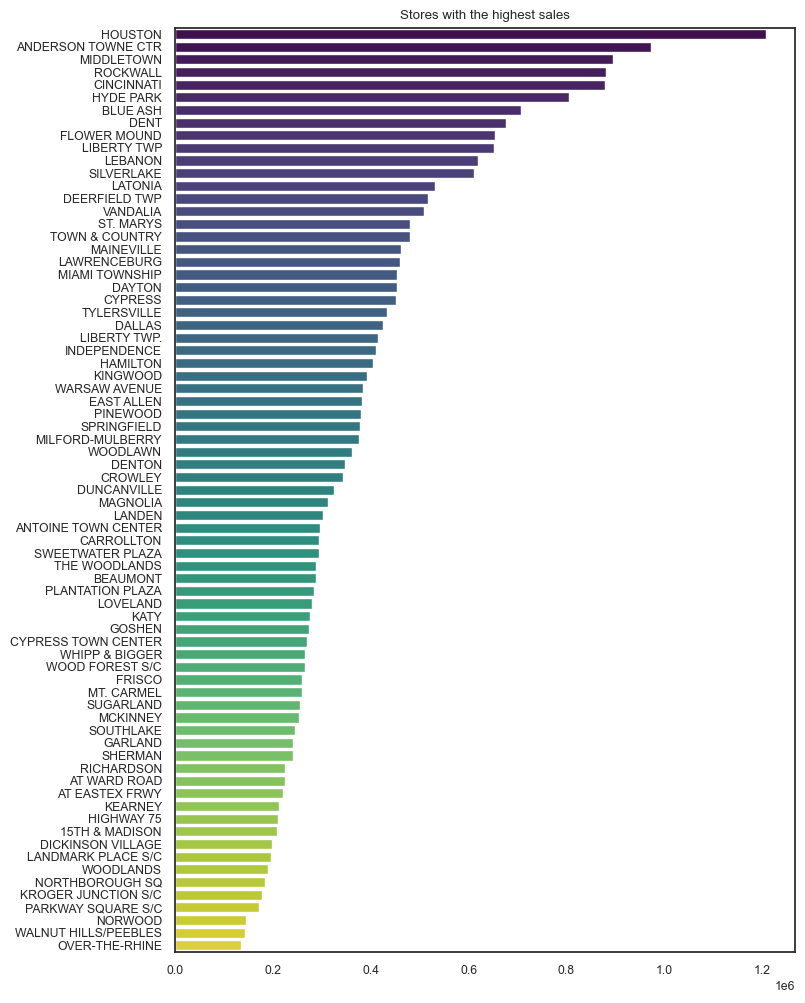

In [917]:
# This code creates a horizontal bar plot to visualize stores with the highest total sales.

plt.figure(figsize=(8, 12))
sns.barplot(y='store_name', x='Total sales', data=sales_by_store_sorted, palette='viridis')
plt.xlabel('')
plt.ylabel('', fontsize=6)
plt.title('Stores with the highest sales')
plt.show()


In [642]:
# This code assigns a store size category ('small store', 'medium store', or 'large store') based on the sales area size.

df['store_size'] = ""
for index, row in df.iterrows():
    if row['sales_area_size_num'] < 35000:
        df.at[index, 'store_size'] = "small store"
    elif row['sales_area_size_num'] >= 35000 and row['sales_area_size_num'] <= 60000:
        df.at[index, 'store_size'] = "medium store"
    else:
        df.at[index, 'store_size'] = "large store"


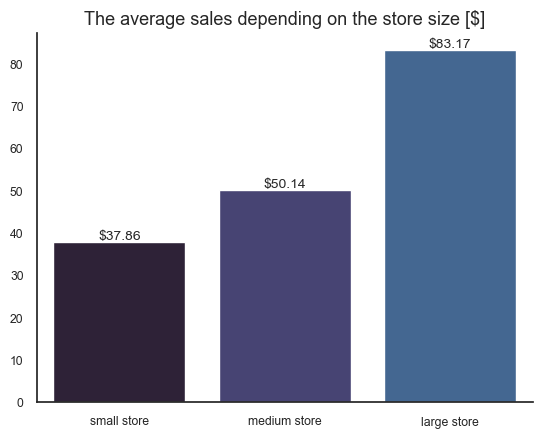

In [913]:
# This code calculates and visualizes the average sales depending on the store size using a bar plot.

df_store_size = round(df.groupby('store_size')['spend'].mean(),2).sort_values(ascending=True).reset_index()

df_store_size =sns.barplot(x='store_size', y='spend', data = df_store_size, )
plt.xlabel('')
plt.ylabel('')
plt.title('The average sales depending on the store size [$]', fontsize=13)
df_store_size.bar_label(a.containers[0], fmt='$%.2f', fontsize=10)
sns.despine()


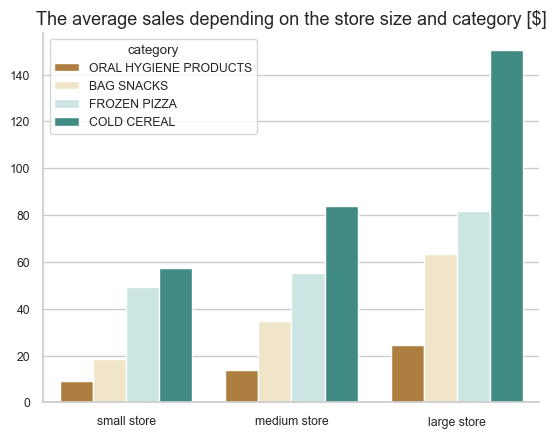

In [575]:
# This code calculates and visualizes the average sales depending on the store size and category using a grouped bar plot.

df_store_size = round(df.groupby(['store_size', 'category'])['spend'].mean(),2).sort_values(ascending=True).reset_index()
sns.set_style('whitegrid')
sns.barplot(x='store_size', y='spend', data = df_store_size, hue='category', palette='BrBG')
plt.xlabel('')
plt.ylabel('')
plt.title('The average sales depending on the store size and category [$]', fontsize=13)
sns.despine()

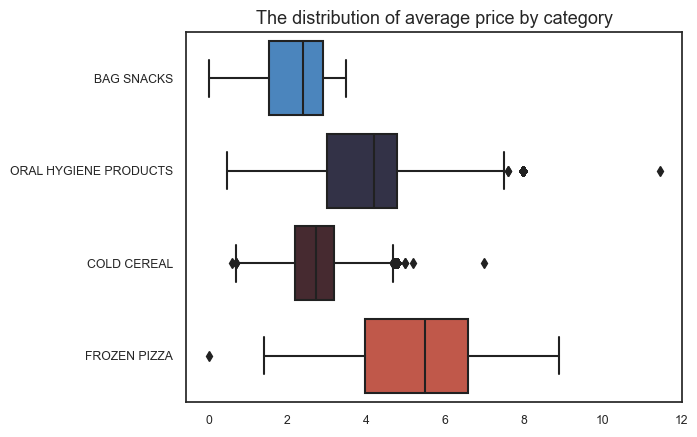

In [609]:
# This code creates a boxplot to visualize the distribution of average price by category, with a white background style.

sns.set_style("white")

sns.boxplot(data=df, x='price', y='category', palette='icefire')
plt.xlabel('')
plt.ylabel('')
plt.title('The distribution of average price by category', fontsize=13)
plt.show()

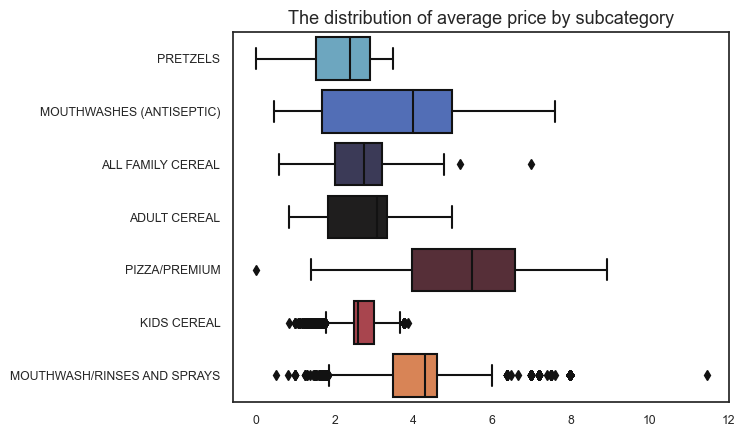

In [613]:
# This code creates a boxplot to visualize the distribution of average price by subcategory, using the 'icefire' color palette.

sns.boxplot(data=df, x='price', y='sub_category', palette='icefire')
plt.xlabel('')
plt.ylabel('')
plt.title('The distribution of average price by subcategory', fontsize=13)
plt.show()

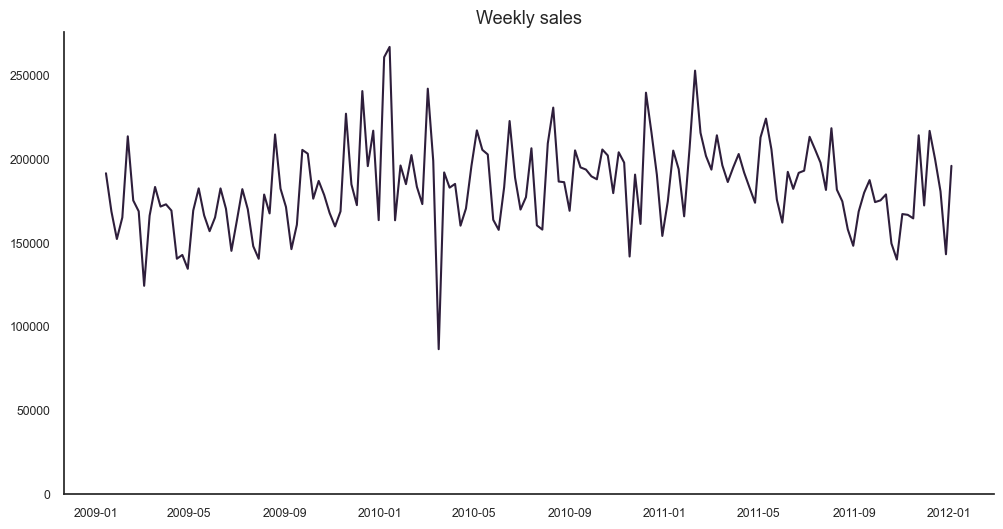

In [695]:
# This code calculates and visualizes the weekly sales trend over time using a line plot.

date_week = df.groupby('week_end_date')['spend'].agg(['sum', 'count', 'mean']).reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=date_week, x='week_end_date', y='sum')
plt.xlabel('')
plt.ylabel('')
plt.title('Weekly sales',fontsize=13)
sns.despine()
plt.ylim(0)
plt.show()


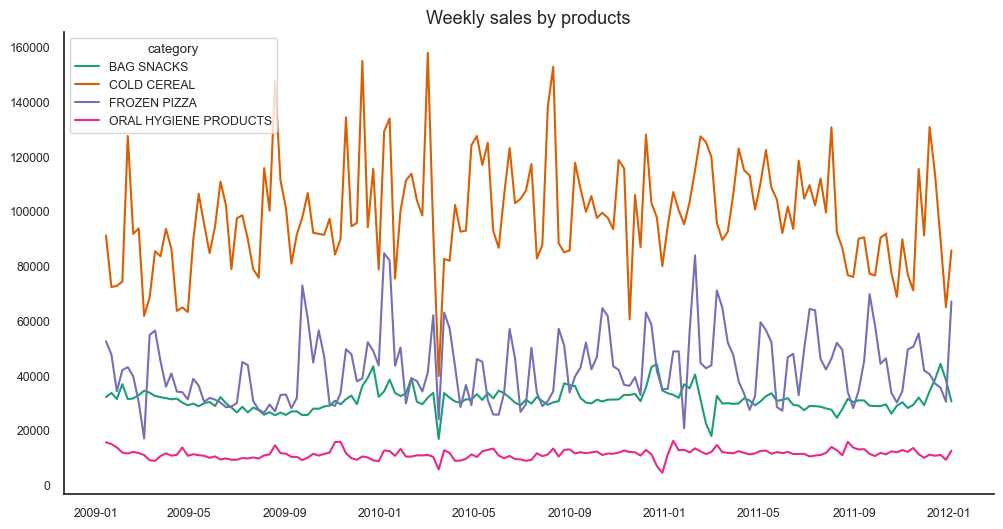

In [700]:
# This code calculates and visualizes the weekly sales trend by product category over time using a line plot with different colors for each category.

date_spend = df.groupby(['week_end_date', 'category'])['spend'].agg(['sum', 'count']).reset_index()


plt.figure(figsize=(12,6))
sns.lineplot(data=date_spend, x='week_end_date', y='sum', hue='category', palette='Dark2')
plt.xlabel('')
plt.ylabel('')
plt.title('Weekly sales by products', fontsize=13)
sns.despine()
plt.show()

In [701]:
df.head()

,week_end_date,units,visits,hhs,spend,price,base_price,feature,display,tpr_only,store_name,address_city_name,address_state_prov_code,seg_value_name,sales_area_size_num,avg_weekly_baskets,description,manufacturer,category,sub_category,product_size,store_size
0,2009-01-14,13,13,13,18.07,1.39,1.57,0,0,1,15TH & MADISON,COVINGTON,KY,VALUE,24721,12707,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,small store
1,2009-01-21,24,23,23,33.36,1.39,1.57,0,0,1,15TH & MADISON,COVINGTON,KY,VALUE,24721,12707,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,small store
2,2009-01-28,7,7,7,9.52,1.36,1.36,0,0,0,15TH & MADISON,COVINGTON,KY,VALUE,24721,12707,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,small store
3,2009-02-04,12,12,12,16.56,1.38,1.38,0,0,0,15TH & MADISON,COVINGTON,KY,VALUE,24721,12707,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,small store
4,2009-02-11,16,14,14,24.00,1.50,1.50,0,0,0,15TH & MADISON,COVINGTON,KY,VALUE,24721,12707,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,small store


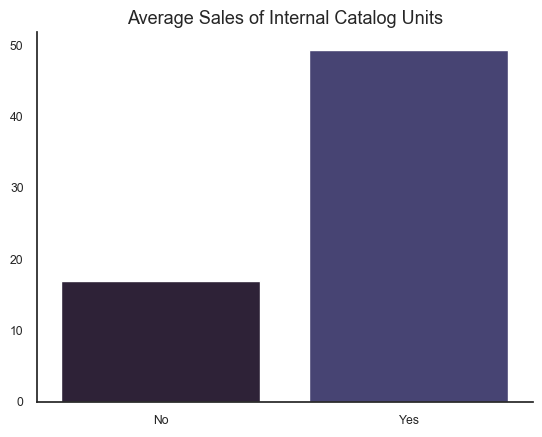

In [780]:
# This code calculates and visualizes the average sales of internal catalog units based on whether they were featured or not.

df['feature'].unique()
df['feature_analysis'] = df['feature'].apply(lambda x: 'Yes' if x == 1 else 'No')
df_feature = df.groupby('feature_analysis')[['spend', 'units']].agg(['sum', 'count']).reset_index()
df_feature.columns = ['feature_analysis', 'spend_sum', 'spend_count', 'units_sum', 'units_count']
df_feature['ratio_spend'] = df_feature['spend_sum'] / df_feature['units_count']
df_feature['ratio_units'] = df_feature['units_sum'] / df_feature['units_count']
df_feature['price'] = df_feature['ratio_spend'] / df_feature['ratio_units']
df_feature

sns.barplot(data=df_feature, x='feature_analysis', y='ratio_units')
plt.xlabel('')
plt.ylabel('')
plt.title('Average Sales of Internal Catalog Units', fontsize=13)
sns.despine()
plt.show()


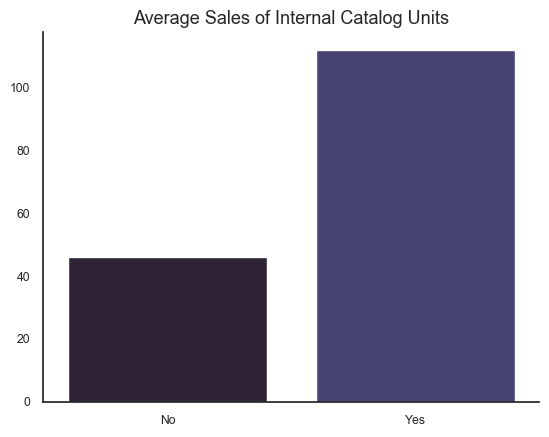

In [904]:
# This code calculates and visualizes the average sales of internal catalog units based on whether they were part of an in-store display or not.

df['display'].unique()
df['display_analysis'] = df['display'].apply(lambda x: 'Yes' if x == 1 else 'No')
df_display = df.groupby('display_analysis')[['spend', 'units']].agg(['sum', 'count']).reset_index()
df_display.columns = ['display_analysis', 'spend_sum', 'spend_count', 'units_sum', 'units_count']
df_display['ratio_spend'] = df_display['spend_sum'] / df_display['units_count']
df_display['ratio_units'] = df_display['units_sum'] / df_display['units_count']
df_display['price'] = df_display['ratio_spend'] / df_display['ratio_units']
df_display

sns.barplot(data=df_display, x='display_analysis', y='ratio_spend')
plt.xlabel('')
plt.ylabel('')
plt.title('Average Sales of Internal Catalog Units', fontsize=13)
sns.despine()
plt.show()


In [790]:
# This code calculates the percentage change in average sales of internal catalog units for each category when featured compared to when not featured.

df_feature2 = df.groupby(['feature_analysis', 'category'])[['spend', 'units']].agg(['sum', 'count']).reset_index()
df_feature2.columns = ['feature_analysis', 'category', 'category_spend_sum', 'category_spend_count', 'category_units_sum', 'category_units_count']
df_feature2['category_ratio_spend'] = df_feature2['category_spend_sum'] / df_feature2['category_units_count']
df_feature2['category_ratio_units'] = df_feature2['category_units_sum'] / df_feature2['category_units_count']
df_feature2['category_price'] = df_feature2['category_ratio_spend'] / df_feature2['category_ratio_units']
df_feature2['category_ratio_spend_divided'] = df_feature2.apply(lambda row: \
    row['category_ratio_spend'] / \
    df_feature2[df_feature2['feature_analysis'] == 'No'] \
        .loc[df_feature2['category'] == row['category'], 'category_ratio_spend'] \
        .values[0] \
    if row['feature_analysis'] == 'Yes' else None, axis=1)
df_feature3 = df_feature2.query("feature_analysis == 'Yes'")
df_feature3['category_ratio_spend_divided'] = df_feature3['category_ratio_spend_divided']*100
df_feature3

C:\Users\Szymon Świeży\AppData\Local\Temp\ipykernel_26556\154112607.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,feature_analysis,category,category_spend_sum,category_spend_count,category_units_sum,category_units_count,category_ratio_spend,category_ratio_units,category_price,category_ratio_spend_divided
4,Yes,BAG SNACKS,177357.89,3288,116571,3288,53.940964,35.453467,1.521458,146.083241
5,Yes,COLD CEREAL,3392238.97,16653,1564914,16653,203.701373,93.971897,2.167684,266.961486
6,Yes,FROZEN PIZZA,2296766.54,19079,495935,19079,120.381914,25.993763,4.631185,263.577877
7,Yes,ORAL HYGIENE PRODUCTS,165443.52,6478,66044,6478,25.539290,10.195122,2.505050,180.271681


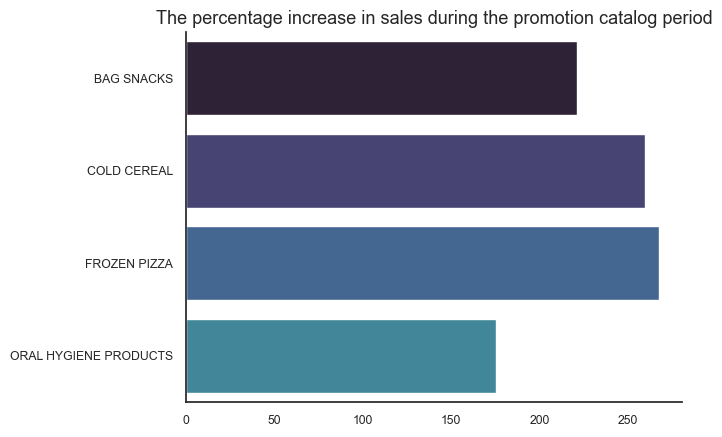

In [786]:
# This code visualizes the percentage increase in sales during the promotion catalog period for each category when featured compared to when not featured using a bar plot.

sns.barplot(data=df_feature3, x='category_ratio_spend_divided', y='category')
plt.xlabel('')
plt.ylabel('')
plt.title('The percentage increase in sales during the promotion catalog period', fontsize=13)
sns.despine()
plt.show()

In [776]:
# This code calculates the percentage change in average sales of internal catalog units for each category when part of an in-store display compared to when not part of a display.

df_display2 = df.groupby(['display_analysis', 'category'])[['spend', 'units']].agg(['sum', 'count']).reset_index()
df_display2.columns = ['display_analysis', 'category', 'category_spend_sum', 'category_spend_count', 'category_units_sum', 'category_units_count']
df_display2['category_ratio_spend'] = df_display2['category_spend_sum'] / df_display2['category_units_count']
df_display2['category_ratio_units'] = df_display2['category_units_sum'] / df_display2['category_units_count']
df_display2['category_price'] = df_display2['category_ratio_spend'] / df_display2['category_ratio_units']
df_display2['category_ratio_spend_divided'] = df_display2.apply(lambda row: \
    row['category_ratio_spend'] / \
    df_display2[df_display2['display_analysis'] == 'No'] \
        .loc[df_display2['category'] == row['category'], 'category_ratio_spend'] \
        .values[0] \
    if row['display_analysis'] == 'Yes' else None, axis=1)
df_display3 = df_display2.query("display_analysis == 'Yes'")
df_display3['category_ratio_spend_divided'] = df_display3['category_ratio_spend_divided']*100
df_display3

C:\Users\Szymon Świeży\AppData\Local\Temp\ipykernel_26556\3389648577.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,display_analysis,category,category_spend_sum,category_spend_count,category_units_sum,category_units_count,category_ratio_spend,category_ratio_units,category_price,category_ratio_spend_divided
4,Yes,BAG SNACKS,1211778.50,16962,748033,16962,71.440779,44.100519,1.619953,221.535366
5,Yes,COLD CEREAL,3083438.00,15288,1413290,15288,201.690084,92.444401,2.181745,259.936901
6,Yes,FROZEN PIZZA,2102741.45,16855,467803,16855,124.754758,27.754554,4.494929,267.600028
7,Yes,ORAL HYGIENE PRODUCTS,251770.55,10349,84839,10349,24.328008,8.197797,2.967628,175.277444


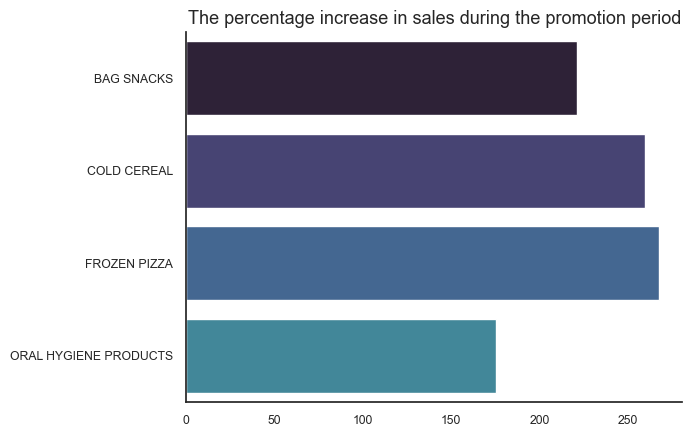

In [777]:
# This code visualizes the percentage increase in sales during the promotion period for each category when part of an in-store display compared to when not part of a display using a bar plot.

sns.barplot(data=df_display3, x='category_ratio_spend_divided', y='category')
plt.xlabel('')
plt.ylabel('')
plt.title('The percentage increase in sales during the promotion period', fontsize=13)
sns.despine()
plt.show()

In [794]:
df_display3['display'] = 'display'
df_display3

C:\Users\Szymon Świeży\AppData\Local\Temp\ipykernel_26556\1590730606.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,display_analysis,category,category_spend_sum,category_spend_count,category_units_sum,category_units_count,category_ratio_spend,category_ratio_units,category_price,category_ratio_spend_divided,display
4,Yes,BAG SNACKS,1211778.50,16962,748033,16962,71.440779,44.100519,1.619953,221.535366,display
5,Yes,COLD CEREAL,3083438.00,15288,1413290,15288,201.690084,92.444401,2.181745,259.936901,display
6,Yes,FROZEN PIZZA,2102741.45,16855,467803,16855,124.754758,27.754554,4.494929,267.600028,display
7,Yes,ORAL HYGIENE PRODUCTS,251770.55,10349,84839,10349,24.328008,8.197797,2.967628,175.277444,display


In [796]:
# This code concatenates the DataFrames df_display3 and df_feature3 along rows, ignoring the index, and stores the result in the DataFrame merged.

merged = pd.concat([df_display3, df_feature3], ignore_index=True)
merged

,display_analysis,category,category_spend_sum,category_spend_count,category_units_sum,category_units_count,category_ratio_spend,category_ratio_units,category_price,category_ratio_spend_divided,display,feature_analysis,feature
0,Yes,BAG SNACKS,1211778.50,16962,748033,16962,71.440779,44.100519,1.619953,221.535366,display,NaN,NaN
1,Yes,COLD CEREAL,3083438.00,15288,1413290,15288,201.690084,92.444401,2.181745,259.936901,display,NaN,NaN
2,Yes,FROZEN PIZZA,2102741.45,16855,467803,16855,124.754758,27.754554,4.494929,267.600028,display,NaN,NaN
3,Yes,ORAL HYGIENE PRODUCTS,251770.55,10349,84839,10349,24.328008,8.197797,2.967628,175.277444,display,NaN,NaN
4,NaN,BAG SNACKS,177357.89,3288,116571,3288,53.940964,35.453467,1.521458,146.083241,NaN,Yes,feature
5,NaN,COLD CEREAL,3392238.97,16653,1564914,16653,203.701373,93.971897,2.167684,266.961486,NaN,Yes,feature
6,NaN,FROZEN PIZZA,2296766.54,19079,495935,19079,120.381914,25.993763,4.631185,263.577877,NaN,Yes,feature
7,NaN,ORAL HYGIENE PRODUCTS,165443.52,6478,66044,6478,25.539290,10.195122,2.505050,180.271681,NaN,Yes,feature


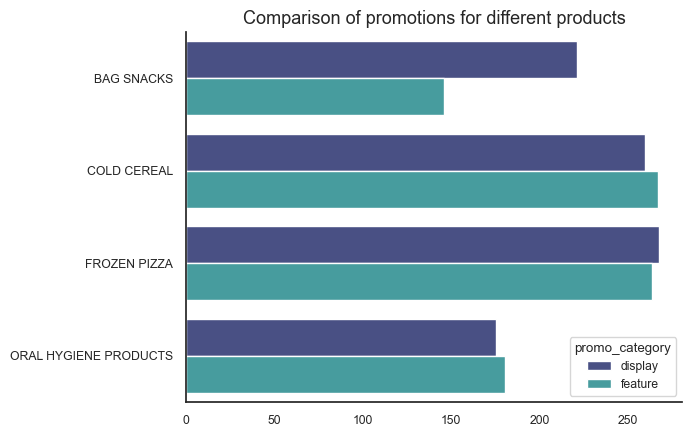

In [804]:
# This code fills missing values in the 'display' and 'feature' columns with empty strings, creates a new column 'promo_category' by concatenating 'display' and 'feature' columns, and then visualizes the comparison of promotions for different products using a bar plot with hue representing the promotional category.

merged['display'] = merged['display'].fillna('')
merged['feature'] = merged['feature'].fillna('')
merged['promo_category'] = merged['display'] + merged['feature']
sns.barplot(data=merged, x='category_ratio_spend_divided', y='category', hue='promo_category', palette='mako')
plt.xlabel('')
plt.ylabel('')
plt.title('Comparison of promotions for different products', fontsize=13)
sns.despine()
plt.show()

In [821]:
# This code calculates the average number of weekly baskets over time by grouping the DataFrame 'df' by 'week_end_date' and aggregating the mean of 'avg_weekly_baskets'.

df_basket = df.groupby('week_end_date')['avg_weekly_baskets'].agg('mean').reset_index()
df_basket

,week_end_date,avg_weekly_baskets
0,2009-01-14,24612.236347
1,2009-01-21,24638.181762
2,2009-01-28,24635.478545
3,2009-02-04,24645.409672
4,2009-02-11,24616.962461
...,...,...
151,2011-12-07,24708.468825
152,2011-12-14,24682.836850
153,2011-12-21,24682.737910
154,2011-12-28,24736.442643


<Axes: xlabel='week_end_date', ylabel='avg_weekly_baskets'>

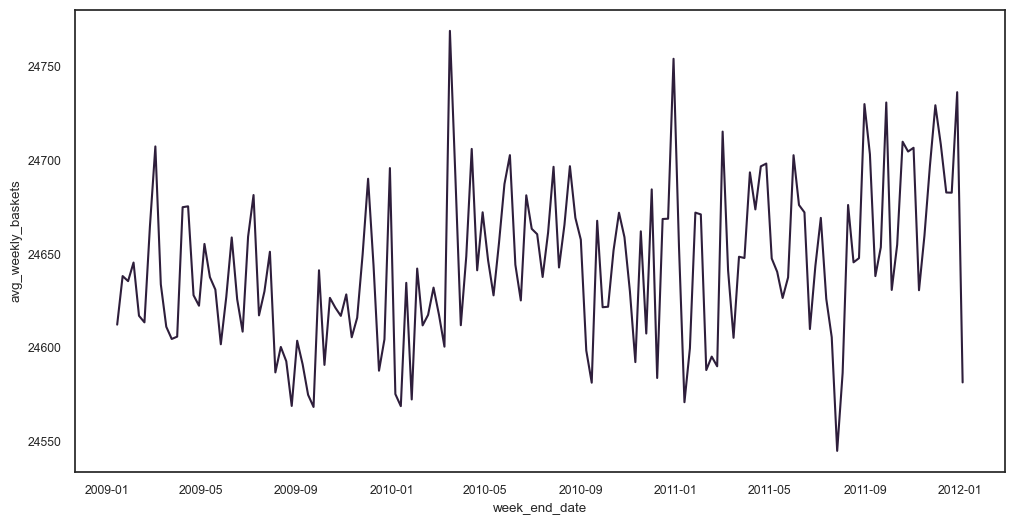

In [827]:
# This code creates a line plot to visualize the trend of the average number of weekly baskets over time.

plt.figure(figsize=(12,6))
sns.lineplot(data=df_basket, x='week_end_date', y='avg_weekly_baskets')
